<H1>Detecting spikes and pass-filters</H2>

In [1]:
%pylab inline
from scipy.signal import find_peaks
from scipy.signal import butter, lfilter

Populating the interactive namespace from numpy and matplotlib


In [2]:
# load data
voltage = np.load('./data/onesec.npy').T # voltage in microVolts
sf = 30000 # sampling frequency (in Hz)
dt = 1/sf # sampling interval (sec)
time = np.linspace(start =0, stop = voltage.size*dt, num = voltage.size )

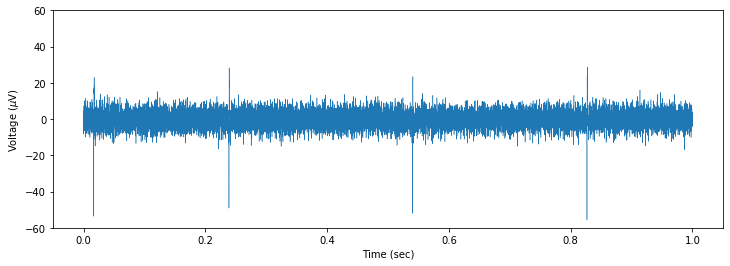

In [3]:
fig = plt.figure(figsize=(12,4))
plt.plot(time, voltage, lw=.5)
plt.xlabel('Time (sec)'), plt.ylabel('Voltage ($\mu$V)');
plt.ylim(-60,60);

<H2>Finding spikes in the raw signal</H2>

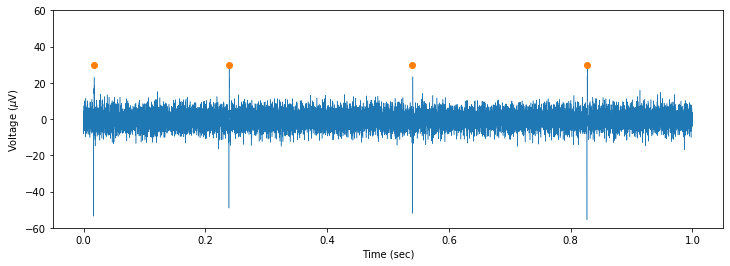

In [4]:
fig = plt.figure(figsize=(12,4))
plt.plot(time, voltage, lw=.5)
plt.xlabel('Time (sec)'), plt.ylabel('Voltage ($\mu$V)');
x, y = find_peaks(voltage*-1, height=20)
plt.ylim(-60,60);
plt.plot(x*dt,np.ones(x.size)*30, 'o')

In [5]:
# take 2 ms spikes 2/dt 
dt_ms =dt*1000 # transform sampling into ms
print(2/dt_ms)

60.0


/Users/segundo.martinez/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


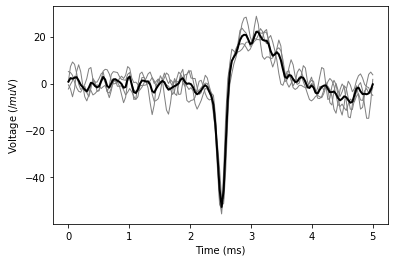

In [6]:
#peak-align spikes
tmax = 5

ms = np.linspace(start=0, stop=tmax, num=tmax/dt_ms)

avg = list()
for peak in x:
    spk = voltage[peak - int((tmax/2)/dt_ms):peak + int((tmax/2)/dt_ms)]
    plt.plot(ms, spk, color='gray', lw=1)
    avg.append(spk)

avg1 = np.mean(avg,axis=0)
plt.plot(ms, avg1, color='black', lw=2);
plt.ylabel('Voltage ($/mu$V)'), plt.xlabel('Time (ms)');

<H2>Band-pass filtering the signal</H2>

In [7]:
def bandpass_filter(data, low, high):
    """
    Perform a band-pass filter of the data with a second-order
    Butter 
    """
    nyq = sf/2 # Nysquid is 15 kHz
    
    low_band = low/nyq
    high_band = high/nyq
    
    # calculate the coefficients
    b, a = butter(N=2, Wn = [low_band, high_band], btype = 'band')
    # filter signal
    filtered_data = lfilter(b, a, data)
    
    return filtered_data

In [8]:
f_voltage = bandpass_filter(data = voltage, low = 300, high = 6000)

<H2> Finding spikes in the filtered signal</H2>

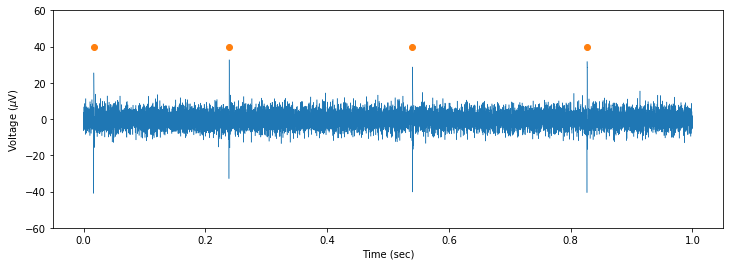

In [9]:
fig = plt.figure(figsize=(12,4))
plt.plot(time, f_voltage, lw=.5)
plt.xlabel('Time (sec)'), plt.ylabel('Voltage ($\mu$V)');
x, y = find_peaks(f_voltage*-1, height=20)
plt.ylim(-60,60);
plt.plot(x*dt,np.ones(x.size)*40, 'o')

/Users/segundo.martinez/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


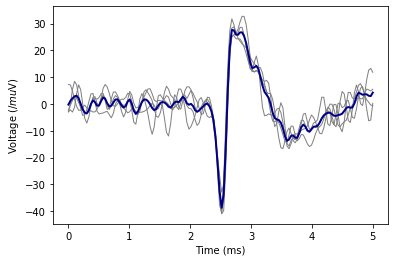

In [10]:
#peak-align spikes
tmax = 5

ms = np.linspace(start=0, stop=tmax, num=tmax/dt_ms)

avg = list()
for peak in x:
    spk = f_voltage[peak - int((tmax/2)/dt_ms):peak + int((tmax/2)/dt_ms)]
    plt.plot(ms, spk, color='gray', lw=1)
    avg.append(spk)

avg2 = np.mean(avg,axis=0)
plt.plot(ms, avg2, color='darkblue', lw=2);
plt.ylabel('Voltage ($/mu$V)'), plt.xlabel('Time (ms)');

<H2>Compare spike averages </H2>

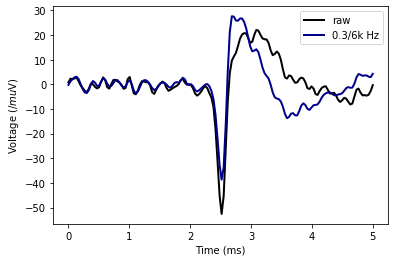

In [11]:
plt.plot(ms, avg1, color='black', lw =2, label='raw')
plt.plot(ms, avg2, color='darkblue', lw=2, label='0.3/6k Hz');
plt.ylabel('Voltage ($/mu$V)'), plt.xlabel('Time (ms)');
plt.legend()